<a href="https://colab.research.google.com/github/Samuel-wei/Darknet-1/blob/master/yolov3_detector_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a YOLOv3 Object Detector with Darknet in the Cloud(GPU ENABLED)

## Step 1: Enabling GPU  within your notebook

## Step 2: Cloning and Building Darkent

The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OpenCV and GPU for darknet an then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [31]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet


fatal: destination path 'darknet' already exists and is not an empty directory.


In [32]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

[Errno 20] Not a directory: 'darknet'
/content/darknet


In [33]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [34]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:909:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/http_stream.cpp -o obj/http_stre

## Step 3: Download pretrained and define helper funcitons

YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections




In [0]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-03-19 06:20:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights        9%[>                   ]  23.62M   302KB/s    eta 9m 33s 

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

## Step 4: Run Detections with Darknet and YOLOv3
Darknet is now built and ready to run detections using YOLOv3 in the cloud! You can find out which sorts of classes the pretrained YOLOv3 weights can detect by clicking here.[COCO CLASSES](http://cocodataset.org/#explore)

The object detector can be run using the following command

`$ ./darknet detect <path to config> <path to weights> <path to image>`

Darknet comes with a few images already installed in the darkent/data/folder.

Note: After runing detections OpenCV can't open the image instantly in the cloud so we must run:

`imShow('predictions.jpg')`

This will output the image wiht the detections shown. The most recent detections are always saved to 'predictions.jpg'

Try out the examples below for yourself!

In [36]:
# run darknet detection
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     26 x  26 x 128 ->   26 x  26 x 256 0.399 BF
   9 ma

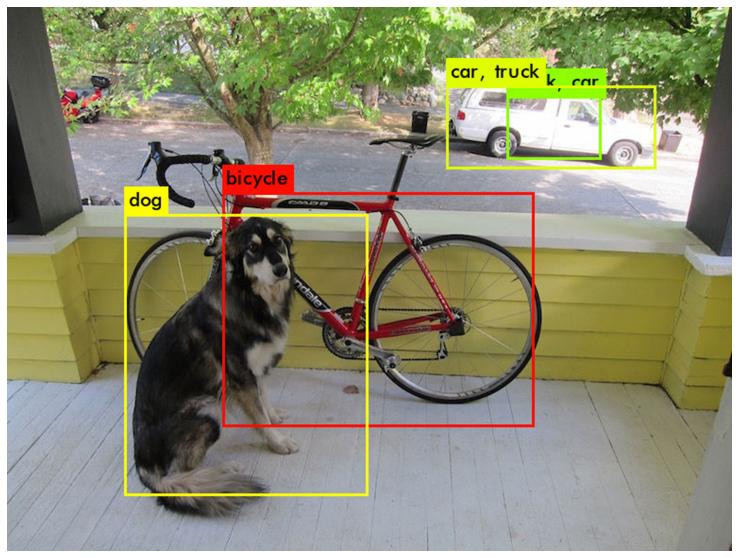

In [37]:
# show image using our helper function
imShow('predictions.jpg')

In [38]:
# look we can ran another detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

KeyboardInterrupt: ignored

WOW this is magic! Make sure to click this link to be blessed with lots of YOLOv3 luck!!!

[https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1](https://www.youtube.com/channel/UCrydcKaojc44XnuXrfhlV8Q?sub_confirmation=1)

In [0]:
# This stops 'Run all' at this cell by causing an error
assert False

## Step 5: Uploading Local or Google Drive Files to Use

you may want to run detections on more than just image within the darknet/data/folder. This step will show you how to upload local or Google Drive files to the cloud VM an run detections on them!

### Method 1: Local Files

to upload local files just use our helper function by running 'upload()' as seen below. Click Choose Files and select the image from your local machine that you want to upload to the cloud VM.

If this function doen't work for you then click the Upload button in the File explorer on the left side of your notebook.

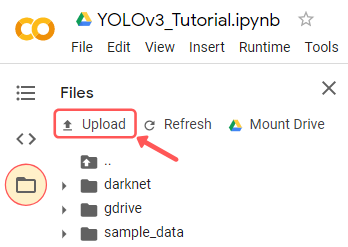

The image should save to your root directory so that you can access it from your darknet command by runing.

`!./darknet detect cfg/yolov3.cfg yolov3.weights ../<your image name>`

In [0]:
# upload an image to root directory 
%cd ..
upload()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# make sure you are in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../street.jpg